# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE
body_fat_df = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/560_bodyfat/560_bodyfat.tsv.gz", sep="\t")
body_fat_df.sample(10)

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
65,1.0313,55.0,183.50,67.50,40.900002,103.000000,100.300003,104.199997,64.800003,40.200001,22.700001,34.799999,30.100000,18.700001,30.000000
197,1.0583,42.0,168.00,71.50,36.500000,92.000000,89.699997,101.000000,62.299999,38.000000,22.299999,30.799999,27.799999,16.900000,17.700001
26,1.0811,34.0,131.50,67.50,36.200001,88.599998,74.599998,85.300003,51.700001,34.700001,21.400000,28.700001,27.000000,16.500000,7.900000
141,1.0571,40.0,173.25,69.50,36.500000,99.500000,93.000000,99.300003,60.400002,38.200001,22.000000,32.000000,28.500000,17.799999,18.299999
128,1.0515,40.0,192.25,73.25,39.799999,103.900002,93.500000,99.500000,61.700001,39.000000,21.799999,33.299999,29.600000,18.100000,20.799999
69,1.0693,55.0,156.75,71.50,36.299999,94.400002,84.599998,94.300003,51.200001,37.400002,21.600000,27.299999,27.100000,17.299999,12.900000
103,1.0480,49.0,196.75,73.75,40.700001,103.500000,95.500000,101.599998,59.099998,39.799999,25.400000,31.000000,30.299999,19.700001,22.299999
120,1.0358,52.0,206.50,74.50,40.799999,104.300003,99.199997,104.099998,58.500000,39.299999,24.600000,33.900002,31.200001,19.500000,27.900000
235,1.0563,62.0,168.75,67.50,38.299999,104.699997,95.599998,93.699997,54.400002,37.099998,22.700001,30.299999,26.299999,18.299999,18.600000
187,1.0524,41.0,210.50,72.00,38.500000,107.400002,98.900002,104.099998,63.500000,39.799999,23.500000,36.400002,30.400000,19.100000,20.400000


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [4]:
# YOUR CODE HERE
list(body_fat_df.columns)

['Density',
 'Age',
 'Weight',
 'Height',
 'Neck',
 'Chest',
 'Abdomen',
 'Hip',
 'Thigh',
 'Knee',
 'Ankle',
 'Biceps',
 'Forearm',
 'Wrist',
 'target']

'Density' = Body density of the man in this study using Siri's (1956) equation from underwater weight <br>
'Age' = How old in years the man was at the time of measurement <br>
'Weight' = Weight in lbs <br>
'Height' = Height in inches <br>
'Neck' = Circumference in centimeters <br>
'Chest' = Circumference in centimeters <br>
'Abdomen' = Circumference in centimeters <br>
'Hip' = Circumference in centimeters <br>
'Thigh' = Circumference in centimeters <br>
'Knee' = Circumference in centimeters <br>
'Ankle' = Circumference in centimeters <br>
'Biceps' = Circumference in centimeters when extended <br>
'Forearm' = Circumference in centimeters <br>
'Wrist' = Circumference in centimeters <br>
'target' = Our Target variable that is percentage of body fat <br>

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [5]:
print(body_fat_df.nunique())

stats = body_fat_df.agg(['min', 'mean', 'max'])
print(stats)


Density    218
Age         51
Weight     197
Height      48
Neck        90
Chest      174
Abdomen    185
Hip        152
Thigh      139
Knee        90
Ankle       61
Biceps     104
Forearm     77
Wrist       44
target     176
dtype: int64
       Density        Age      Weight    Height       Neck       Chest  \
min   0.995000  22.000000  118.500000  29.50000  31.100000   79.300003   
mean  1.055574  44.884921  178.924405  70.14881  37.992064  100.824206   
max   1.108900  81.000000  363.149994  77.75000  51.200001  136.199997   

         Abdomen         Hip      Thigh       Knee      Ankle     Biceps  \
min    69.400002   85.000000  47.200001  33.000000  19.100000  24.799999   
mean   92.555952   99.904762  59.405952  38.590476  23.102381  32.273413   
max   148.100006  147.699997  87.300003  49.099998  33.900002  45.000000   

        Forearm      Wrist     target  
min   21.000000  15.800000   0.000000  
mean  28.663889  18.229762  19.150794  
max   34.900002  21.400000  47.500000  


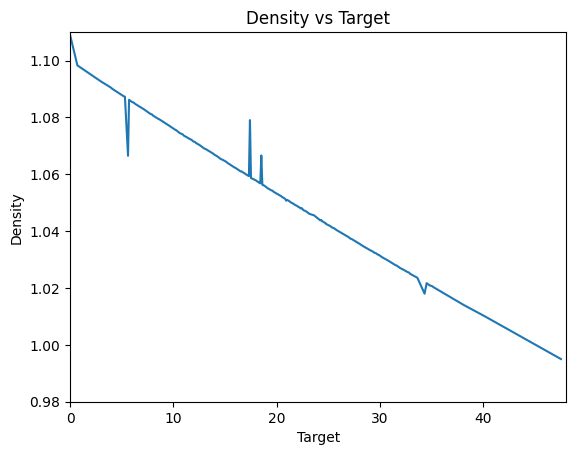

In [6]:
body_fat_df.groupby("target")["Density"].mean(numeric_only=True).plot()
plt.title("Density vs Target")
plt.xlabel("Target")
plt.ylabel("Density")
plt.xlim(0, 48)
plt.ylim(.98, 1.11)
plt.show()


During my exploratory analysis, I found a strong correlation between Density and Target when looking at averages. <br>
Upon plotting this, my observation was confirmed, there seems to be a linear relationship between <br>
Density and our Target variable. The lower Density score, seems to correlate with higher fat percentage. 

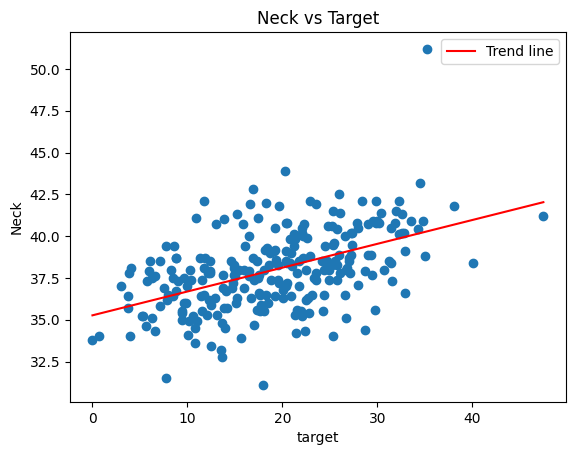

In [7]:

plt.scatter(body_fat_df["target"], body_fat_df["Neck"])
coefficients = np.polyfit(body_fat_df["target"], body_fat_df["Neck"], 1)

poly_eq = np.poly1d(coefficients) 
x_fit = np.linspace(body_fat_df["target"].min(), body_fat_df["target"].max(), 100)
y_fit = poly_eq(x_fit)

plt.plot(x_fit, y_fit, color='red', label='Trend line')

plt.title("Neck vs Target")
plt.xlabel('target')
plt.ylabel('Neck')
plt.legend()
plt.show()

You also see a similar correlation with neck circumference when compared to the target variable.<br>
The higher fat percentage tends to correlate with a larger neck circumference.<br>
This is shown by the trend line on the scatter plot.

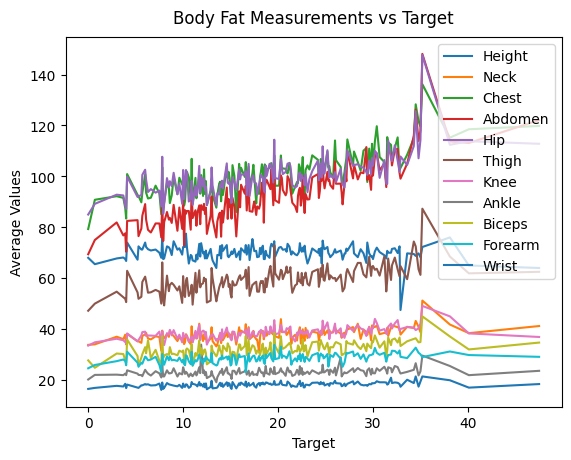

In [8]:
averge_measure = body_fat_df.groupby('target')[['Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']].mean()

plt.Figure(figsize= (14, 10))
averge_measure.plot(kind='line')

plt.xlabel('Target')
plt.ylabel('Average Values')
plt.title('Body Fat Measurements vs Target', pad=10)
plt.show()



After finding some correlation between the trend of neck circumference, I wanted to explore if there were any correlation between body measurements.<br>
This could prove interesting if we find another correlation between a measurement and our target variable.<br>
Unfortunatly, we had to remove Weight as there didnt seem to be a strong relationship with the Target variable, and was making the line chart look more congrested.<br>
However, it seems that teh Abdomen seems to have the most slop so there could be a relationship between Abdomen and our Target variable which I found interesting.<br> 

YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

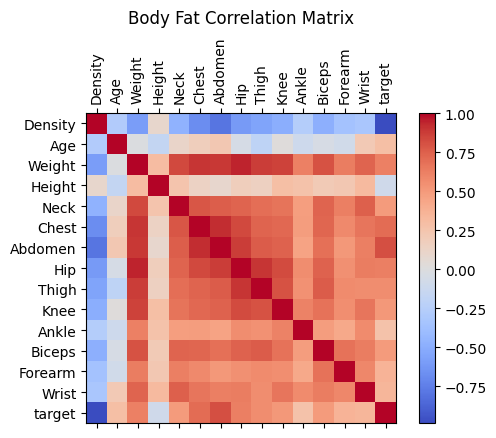

In [9]:
corr_matrix = body_fat_df.corr()

plt.figure(figsize=(6, 4))
plt.matshow(corr_matrix, fignum=1, cmap='coolwarm')

plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr_matrix.index)), labels=corr_matrix.index)

plt.colorbar()
plt.title("Body Fat Correlation Matrix", pad=10)
plt.show()

We find a very strong negative correlation between Density and our Target variable which we discovered during our prior exploratory analysis.<br>
We also see there is a strong positive correlation between Hip and Weight, Hip and Thigh, and Abdomen and Chest.<br>
It also seems like Weight has a stronger positive corrlation with the other measurements of the body parts.<br>
The strongest positive correlation with our Target variable seems to be Abdomen, which we also found interesting in our prior exploratory analysis.

YOUR ANSWERS HERE

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

**Linear Regression:** <br>
Sckit Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
2nd Documentation: https://www.geeksforgeeks.org/machine-learning/python-linear-regression-using-sklearn/ <br>
<br>
**Ridge Regression:** <br>
Sckit Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html <br>
2nd Documentation: https://www.geeksforgeeks.org/machine-learning/ml-ridge-regressor-using-sklearn/ <br>
<br>
**Lasso Regression:** <br>
Sckit Documentation: https://scikit-learn.org/stable/modules/linear_model.html#lasso <br>
2nd Documentation: https://www.tutorialspoint.com/scikit_learn/scikit_learn_lasso.htm 

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [11]:
# YOUR CODE HERE
def plot_model(model, features, target):
    model_name = str(type(model))[8:-2]

    model_predictions = model.predict(features)
    model_score = model.score(features, target)
    max_value = model_predictions.max()

    plt.plot([0, max_value], [0, max_value], label= "actual=predicted", color="red")
    plt.scatter(model_predictions, target, color="blue", alpha=0.3)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} Actual vs Predicted  (R^2 = {model_score:.2f})")
    plt.show()

def show_model_details(model, features, target):
    model_name = str(type(model))[8:-2]

    model_score = model.score(features, target)
    print(f"{model_name}")
    print(f"R^2 = {model_score: .2f}")

    if 'coef_' in dir(model):
        df_coef = pd.DataFrame(model.coef_, features.columns, columns=['coefficients'])
        df_coef['Mean'] = features.mean()
        df_coef['Contribution'] = df_coef['coefficients'] * df_coef['Mean']
        df_coef.loc['intercept', 'coefficients'] = model.intercept_
        print(df_coef)

Using features: Index(['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip',
       'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')
sklearn.linear_model._base.LinearRegression
R^2 =  0.98
           coefficients        Mean  Contribution
Density     -411.237960    1.055574   -434.092020
Age            0.012587   44.884921      0.564974
Weight         0.010054  178.924405      1.798993
Height        -0.007981   70.148810     -0.559827
Neck          -0.028457   37.992064     -1.081149
Chest          0.026780  100.824206      2.700069
Abdomen        0.018565   92.555952      1.718303
Hip            0.019165   99.904762      1.914687
Thigh         -0.016757   59.405952     -0.995493
Knee          -0.004641   38.590476     -0.179105
Ankle         -0.085677   23.102381     -1.979338
Biceps        -0.055051   32.273413     -1.776693
Forearm        0.033864   28.663889      0.970679
Wrist          0.007346   18.229762      0.133907
intercept   

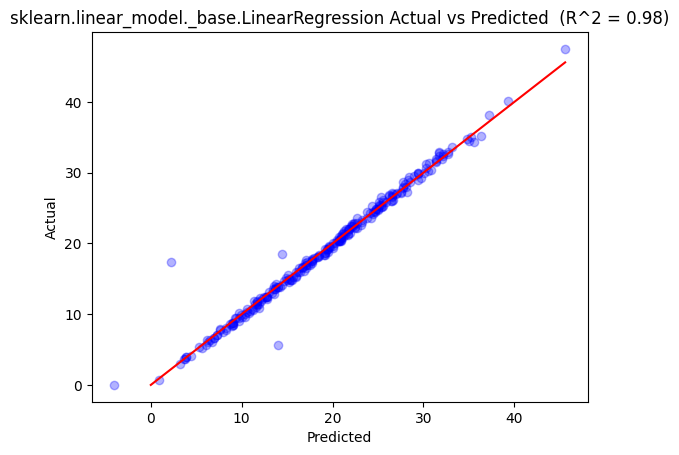

L2 loss (sum of squared errors): 384.8554382995893
L1 loss (sum of absolute errors): 121.00944846697418


In [20]:
target = body_fat_df['target']
features = body_fat_df.drop(columns=['target'])

print(f'Using features: {features.columns}')

model = sklearn.linear_model.LinearRegression()
model.fit(features, target)

show_model_details(model, features, target)
plot_model(model, features, target)

y_pred = model.predict(features)

l2_loss = np.sum((target - y_pred)**2)
print("L2 loss (sum of squared errors):", l2_loss)

l1_loss = np.sum(np.abs(target - y_pred))
print("L1 loss (sum of absolute errors):", l1_loss)

Using features: Index(['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip',
       'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')
sklearn.linear_model._ridge.Ridge
R^2 =  0.76
           coefficients        Mean  Contribution
Density       -9.573201    1.055574    -10.105220
Age            0.060435   44.884921      2.712627
Weight        -0.086539  178.924405    -15.483867
Height        -0.068615   70.148810     -4.813251
Neck          -0.461768   37.992064    -17.543507
Chest         -0.022351  100.824206     -2.253556
Abdomen        0.933099   92.555952     86.363831
Hip           -0.201875   99.904762    -20.168250
Thigh          0.230372   59.405952     13.685468
Knee           0.014336   38.590476      0.553251
Ankle          0.165145   23.102381      3.815238
Biceps         0.175670   32.273413      5.669475
Forearm        0.439703   28.663889     12.603604
Wrist         -1.559264   18.229762    -28.425018
intercept     -7.46003

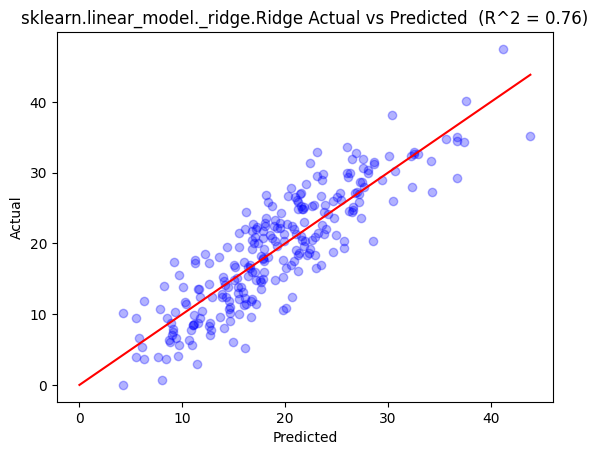

L2 loss (sum of squared errors): 384.8554382995893
L1 loss (sum of absolute errors): 121.00944846697418


In [21]:
target = body_fat_df['target']
features = body_fat_df.drop(columns=['target'])

print(f'Using features: {features.columns}')

model = sklearn.linear_model.Ridge()
model.fit(features, target)

show_model_details(model, features, target)
plot_model(model, features, target)

l2_loss = np.sum((target - y_pred)**2)
print("L2 loss (sum of squared errors):", l2_loss)

l1_loss = np.sum(np.abs(target - y_pred))
print("L1 loss (sum of absolute errors):", l1_loss)

Using features: Index(['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip',
       'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')
sklearn.linear_model._coordinate_descent.Lasso
R^2 =  0.72
           coefficients        Mean  Contribution
Density       -0.000000    1.055574     -0.000000
Age            0.002637   44.884921      0.118382
Weight        -0.123686  178.924405    -22.130445
Height        -0.063989   70.148810     -4.488776
Neck          -0.000000   37.992064     -0.000000
Chest          0.000000  100.824206      0.000000
Abdomen        0.913012   92.555952     84.504652
Hip           -0.000000   99.904762     -0.000000
Thigh          0.027366   59.405952      1.625711
Knee           0.000000   38.590476      0.000000
Ankle         -0.000000   23.102381     -0.000000
Biceps         0.000000   32.273413      0.000000
Forearm        0.000000   28.663889      0.000000
Wrist         -0.000000   18.229762     -0.000000
intercept

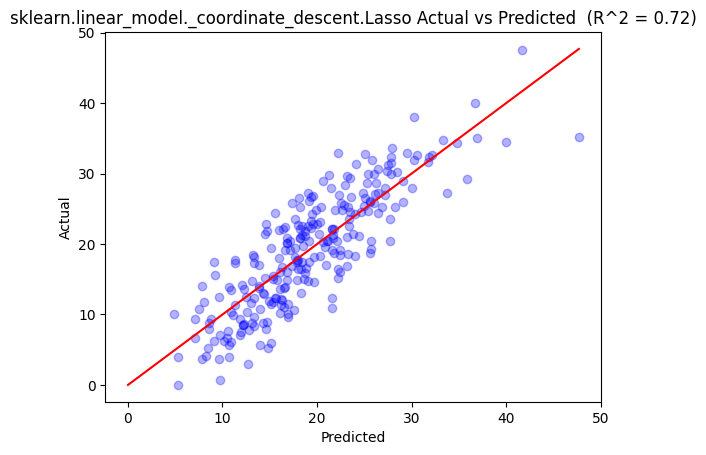

L2 loss (sum of squared errors): 384.8554382995893
L1 loss (sum of absolute errors): 121.00944846697418


In [22]:
target = body_fat_df['target']
features = body_fat_df.drop(columns=['target'])

print(f'Using features: {features.columns}')

model = sklearn.linear_model.Lasso()
model.fit(features, target)

show_model_details(model, features, target)
plot_model(model, features, target)

l2_loss = np.sum((target - y_pred)**2)
print("L2 loss (sum of squared errors):", l2_loss)

l1_loss = np.sum(np.abs(target - y_pred))
print("L1 loss (sum of absolute errors):", l1_loss)

YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE